# MNISTデータセットの準備

In [3]:
# パッケージの読み込み
using Flux
using Flux.Data: DataLoader
using Flux: onehotbatch, onecold
using Flux.Losses: logitcrossentropy
using MLDatasets

# データセットの読み込み
x_train, y_train = MLDatasets.MNIST.traindata(Float32)
x_test, y_test = MLDatasets.MNIST.testdata(Float32)

┌ Warning: MNIST.traindata() is deprecated, use `MNIST(split=:train)[:]` instead.
└ @ MLDatasets C:\Users\stone\.julia\packages\MLDatasets\268Pz\src\datasets\vision\mnist.jl:187
┌ Warning: MNIST.testdata() is deprecated, use `MNIST(split=:test)[:]` instead.
└ @ MLDatasets C:\Users\stone\.julia\packages\MLDatasets\268Pz\src\datasets\vision\mnist.jl:195


(features = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

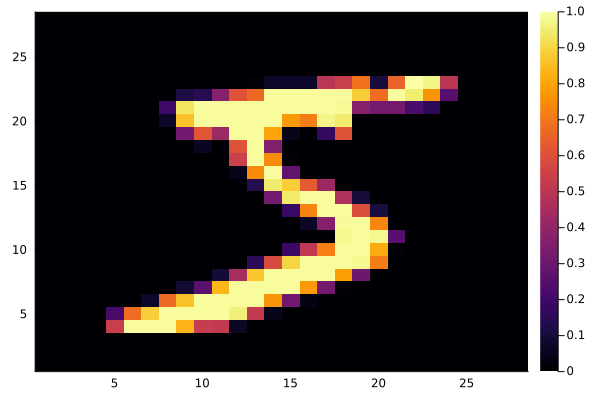

In [4]:
# データの可視化
using Plots
heatmap(rotl90(x_train[1:28, 1:28, 1])) # そのままだと横向きに表示されてしまうので、rotl90で行列を右に90度回転させる

In [5]:
# データを(サンプル数×特徴量の個数)に変換する

## 訓練データ
flatten_x_train = transpose(Flux.flatten(x_train)) # 60,000×784
### 60,000枚の画像だと多すぎるので、最初の1,000枚だけを使う
flatten_x_train = flatten_x_train[1:1000, :]

## テストデータ
flatten_x_test = transpose(Flux.flatten(x_test)) # 10,000×784
### 10,000枚の画像だと多すぎるので、最初の1,000枚だけを使う
flatten_x_test = flatten_x_test[1:1000, :]

1000×784 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [6]:
# one-hot-labelへの変換
## 訓練データ
one_hot_label_y_train =  permutedims(onehotbatch(y_train, 0:9)) # 60,000×10
### 60,000枚の画像だと多すぎるので、最初の1,000枚だけを使う
one_hot_label_y_train = one_hot_label_y_train[1:1000, :]

## テストデータ
one_hot_label_y_test = permutedims(onehotbatch(y_test, 0:9)) # 10,000×10
### 10,000枚の画像だと多すぎるので、最初の1,000枚だけを使う
one_hot_label_y_test = one_hot_label_y_test[1:1000, :]

1000×10 Matrix{Bool}:
 0  0  0  0  0  0  0  1  0  0
 0  0  1  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  1
 ⋮              ⋮           
 0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 1  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  1

# オンライン学習

## パラメータ推定

In [5]:
using LinearAlgebra, Statistics, Random
"""
データ
    訓練データ(特徴量)：flatten_x_train
    訓練データ(目的変数)：one_hot_label_y_train
"""

"""
パラメータ
"""
# 学習率
α = 0.005

# 入力層のサイズ
input_size = size(flatten_x_train)[2] # 784

# 隠れ層のサイズ
hidden_size = 300

# 出力層のサイズ
output_size = 10

W_0_1 = 0.2*rand(input_size, hidden_size).-0.1
W_1_2 = 0.2*rand(hidden_size, output_size).-0.1

# イテレーション
max_iteration = 100

"""
関数
"""
relu(x) = (x>0)*x

relu2deriv(output) = output>0


"""
誤差逆伝播法
"""
# MSEを保存する用のリストを作成
online_train_mse_list = []
online_test_mse_list = []

for iteration=1:max_iteration
    for index=1:size(flatten_x_train)[1]
        # 順伝播
        layer_0 = flatten_x_train[index, :]' # flatten_x_train[index, :]は横ベクトルで値を取得したはずが、縦ベクトルに勝手に変換されてしまう。そのため転置を行っている。
        layer_1_1 = layer_0*W_0_1 # 中間層の活性化関数に入れる前
        layer_1_2 = relu.(layer_1_1) # 中間層の活性化関数に入れた後
        
        # Dropoutを行う
        dropout_mask = reshape(rand(0:2, size(layer_1_2)[2]), 1, size(layer_1_2)[2])
        layer_1_2 = layer_1_2.*dropout_mask
        
        layer_2 = layer_1_2*W_1_2
            
        # 更新式の差分
        ## layer_2のパラメータの更新式の差分
        ### layer_2ではなく、layer_2[1]としているのは、layer2が(1, 1)の行列になっているから
        layer_2_delta = layer_2-one_hot_label_y_train[index, :]'
        W_1_2_delta = α*layer_1_2'*layer_2_delta # 次はここから直す
        
        ## layer_1のパラメータの更新式の差分
        layer_1_delta = (W_1_2*layer_2_delta'.*relu2deriv.(layer_1_1'))'
        layer_1_delta = layer_1_delta.*dropout_mask
        W_0_1_delta = α*reshape(layer_0, 1, 784)'*layer_1_delta

        # 更新
        W_1_2 = W_1_2-W_1_2_delta        
        W_0_1 = W_0_1-W_0_1_delta
        
    end
    
    # MSE(Mean Square Error)の計算
    ## 全てのデータに対して順伝播を行う
    ### 訓練データ
    Layer_1_1_train = flatten_x_train*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_train = relu.(Layer_1_1_train) # 中間層の活性化関数に入れた後
    pred_list_train = Layer_1_2_train*W_1_2
    
    mse_train = mean((pred_list_train-one_hot_label_y_train).^2)
    push!(online_train_mse_list, mse_train)
        
    ### テストデータ
    Layer_1_1_test = flatten_x_test*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_test = relu.(Layer_1_1_test) # 中間層の活性化関数に入れた後
    pred_list_test = Layer_1_2_test*W_1_2
    
    mse_test = mean((pred_list_test-one_hot_label_y_test).^2)
    push!(online_test_mse_list, mse_test)
        
end

## イテレーションとMSEの変化

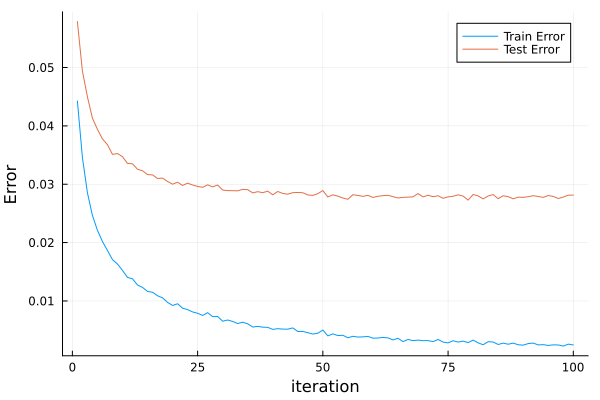

In [6]:
using Plots
plot(1:max_iteration,  online_train_mse_list, label="Train Error", xlabel="iteration", ylabel="Error")
plot!(1:max_iteration, online_test_mse_list , label="Test Error" , xlabel="iteration", ylabel="Error")

## listをDataFrameに変換

In [7]:
using DataFrames
online_train_mse_df = DataFrame(mse=online_train_mse_list)
online_test_mse_df  = DataFrame(mse=online_test_mse_list)

Row,mse
,Any
1,0.0578766
2,0.0493961
3,0.0449935
4,0.0413237
5,0.0394242
6,0.0377764
7,0.0367693
8,0.0351161
9,0.0352567


## csvに出力

In [8]:
using CSV
CSV.write("online_train_mse.csv", online_train_mse_df)
CSV.write("online_test_mse.csv" , online_test_mse_df)

"online_test_mse.csv"

# 確率的勾配降下法

In [9]:
using LinearAlgebra, Statistics, Random
"""
データ
    訓練データ(特徴量)：flatten_x_train
    訓練データ(目的変数)：one_hot_label_y_train
"""

"""
パラメータ
"""
# 学習率
α = 0.005

# 入力層のサイズ
input_size = size(flatten_x_train)[2] # 784

# 隠れ層のサイズ
hidden_size = 300

# 出力層のサイズ
output_size = 10

W_0_1 = 0.2*rand(input_size, hidden_size).-0.1
W_1_2 = 0.2*rand(hidden_size, output_size).-0.1

# イテレーション
max_iteration = 100

"""
関数
"""
relu(x) = (x>0)*x

relu2deriv(output) = output>0


"""
誤差逆伝播法
"""
# MSEを保存する用のリストを作成
SGD_train_mse_list = []
SGD_test_mse_list = []

for iteration=1:max_iteration
    for i=1:size(flatten_x_train)[1]
        index = rand(1:size(flatten_x_train)[1], 1)[1]
        # 順伝播
        layer_0 = flatten_x_train[index, :]' # flatten_x_train[index, :]は横ベクトルで値を取得したはずが、縦ベクトルに勝手に変換されてしまう。そのため転置を行っている。
        layer_1_1 = layer_0*W_0_1 # 中間層の活性化関数に入れる前
        layer_1_2 = relu.(layer_1_1) # 中間層の活性化関数に入れた後
        
        # Dropoutを行う
        dropout_mask = reshape(rand(0:2, size(layer_1_2)[2]), 1, size(layer_1_2)[2])
        layer_1_2 = layer_1_2.*dropout_mask
        
        layer_2 = layer_1_2*W_1_2
            
        # 更新式の差分
        ## layer_2のパラメータの更新式の差分
        ### layer_2ではなく、layer_2[1]としているのは、layer2が(1, 1)の行列になっているから
        layer_2_delta = layer_2-one_hot_label_y_train[index, :]'
        W_1_2_delta = α*layer_1_2'*layer_2_delta # 次はここから直す
        
        ## layer_1のパラメータの更新式の差分
        layer_1_delta = (W_1_2*layer_2_delta'.*relu2deriv.(layer_1_1'))'
        layer_1_delta = layer_1_delta.*dropout_mask
        W_0_1_delta = α*reshape(layer_0, 1, 784)'*layer_1_delta

        # 更新
        W_1_2 = W_1_2-W_1_2_delta        
        W_0_1 = W_0_1-W_0_1_delta
        
    end
    
    # MSE(Mean Square Error)の計算
    ## 全てのデータに対して順伝播を行う
    ### 訓練データ
    Layer_1_1_train = flatten_x_train*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_train = relu.(Layer_1_1_train) # 中間層の活性化関数に入れた後
    pred_list_train = Layer_1_2_train*W_1_2
    
    mse_train = mean((pred_list_train-one_hot_label_y_train).^2)
    push!(SGD_train_mse_list, mse_train)
        
    ### テストデータ
    Layer_1_1_test = flatten_x_test*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_test = relu.(Layer_1_1_test) # 中間層の活性化関数に入れた後
    pred_list_test = Layer_1_2_test*W_1_2
    
    mse_test = mean((pred_list_test-one_hot_label_y_test).^2)
    push!(SGD_test_mse_list, mse_test)
        
end

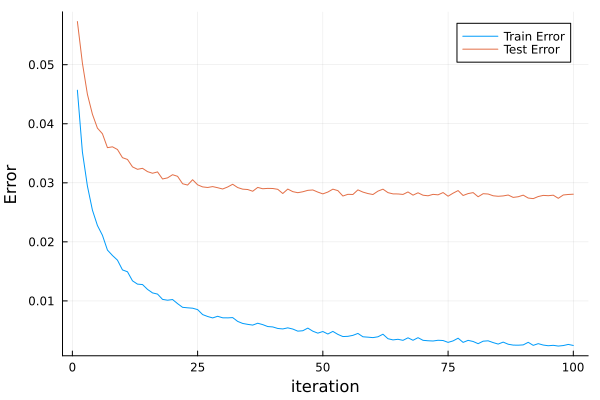

In [10]:
using Plots
plot(1:max_iteration,  SGD_train_mse_list, label="Train Error", xlabel="iteration", ylabel="Error")
plot!(1:max_iteration, SGD_test_mse_list,  label="Test Error",  xlabel="iteration", ylabel="Error")

In [11]:
using DataFrames
SGD_train_mse_df = DataFrame(mse=SGD_train_mse_list)
SGD_test_mse_df = DataFrame(mse=SGD_test_mse_list)

Row,mse
,Any
1,0.0573026
2,0.0502738
3,0.0449914
4,0.0416108
5,0.039257
6,0.0383038
7,0.0359488
8,0.0360936
9,0.035638


In [12]:
using CSV
CSV.write("SGD_train_mse.csv", SGD_train_mse_df)
CSV.write("SGD_test_mse.csv", SGD_test_mse_df)

"SGD_test_mse.csv"

# ミニバッチ勾配降下法

In [13]:
using LinearAlgebra, Statistics, Random
"""
データ
    訓練データ(特徴量)：flatten_x_train
    訓練データ(目的変数)：one_hot_label_y_train
"""

"""
パラメータ
"""
# 学習率
α = 0.005

# 入力層のサイズ
input_size = size(flatten_x_train)[2] # 784

# 隠れ層のサイズ
hidden_size = 300

# 出力層のサイズ
output_size = 10

W_0_1 = 0.2*rand(input_size, hidden_size).-0.1
W_1_2 = 0.2*rand(hidden_size, output_size).-0.1

# イテレーション
max_iteration = 100

# バッチサイズ
batch_size = 100

"""
関数
"""
relu(x) = (x>0)*x

relu2deriv(output) = output>0


"""
誤差逆伝播法
"""
# MSEを保存する用のリストを作成
minibatch_train_mse_list = []
minibatch_test_mse_list = []

for iteration=1:max_iteration
    for i in 1:Int(size(flatten_x_train)[1]/batch_size)-1
        batch_start = i*batch_size
        batch_end = (i+1)*batch_size
        
        # 順伝播
        layer_0 = flatten_x_train[batch_start:batch_end-1, :] # flatten_x_train[index, :]は横ベクトルで値を取得したはずが、縦ベクトルに勝手に変換されてしまう。そのため転置を行っている。
        layer_1_1 = layer_0*W_0_1 # 中間層の活性化関数に入れる前
        layer_1_2 = relu.(layer_1_1) # 中間層の活性化関数に入れた後

        # Dropoutを行う
        dropout_mask = reshape(rand(0:2, batch_size*size(layer_1_2)[2]), batch_size, size(layer_1_2)[2])
        layer_1_2 = layer_1_2.*dropout_mask
        layer_2 = layer_1_2*W_1_2

        # 更新式の差分
        ## layer_2のパラメータの更新式の差分
        ### layer_2ではなく、layer_2[1]としているのは、layer2が(1, 1)の行列になっているから
        layer_2_delta = layer_2-one_hot_label_y_train[batch_start:batch_end-1, :]
        W_1_2_delta = α*layer_1_2'*layer_2_delta # 次はここから直す

        ## layer_1のパラメータの更新式の差分
        layer_1_delta = (W_1_2*layer_2_delta'.*relu2deriv.(layer_1_1'))'
        layer_1_delta = layer_1_delta.*dropout_mask
        W_0_1_delta = α*reshape(layer_0, batch_size, 784)'*layer_1_delta

        # 更新
        W_1_2 = W_1_2-W_1_2_delta        
        W_0_1 = W_0_1-W_0_1_delta

        
    end
    # MSE(Mean Square Error)の計算
    ## 全てのデータに対して順伝播を行う
    ### 訓練データ
    Layer_1_1_train = flatten_x_train*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_train = relu.(Layer_1_1_train) # 中間層の活性化関数に入れた後
    pred_list_train = Layer_1_2_train*W_1_2
    
    mse_train = mean((pred_list_train-one_hot_label_y_train).^2)
    push!(minibatch_train_mse_list, mse_train)
        
    ### テストデータ
    Layer_1_1_test = flatten_x_test*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_test = relu.(Layer_1_1_test) # 中間層の活性化関数に入れた後
    pred_list_test = Layer_1_2_test*W_1_2
    
    mse_test = mean((pred_list_test-one_hot_label_y_test).^2)
    push!(minibatch_test_mse_list, mse_test)
        
end

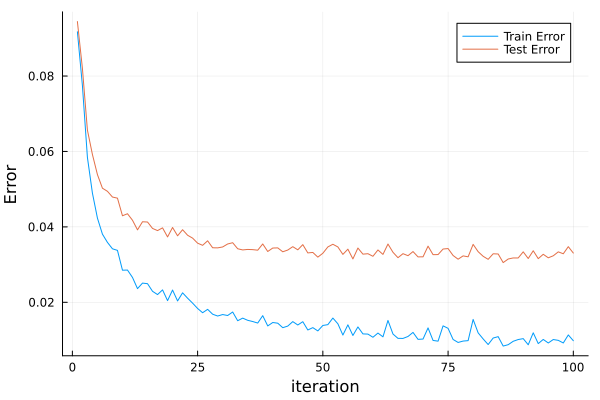

In [14]:
using Plots
plot(1:max_iteration , minibatch_train_mse_list, label="Train Error", xlabel="iteration", ylabel="Error")
plot!(1:max_iteration, minibatch_test_mse_list,  label="Test Error" , xlabel="iteration", ylabel="Error")

In [15]:
using DataFrames
minibatch_train_mse_df = DataFrame(mse=minibatch_train_mse_list)
minibatch_test_mse_df  = DataFrame(mse=minibatch_test_mse_list)

Row,mse
,Any
1,0.0944525
2,0.0820614
3,0.065677
4,0.0592061
5,0.0538728
6,0.0502592
7,0.0494324
8,0.0479163
9,0.0476165


In [16]:
using CSV
CSV.write("minibatch_train_mse.csv", minibatch_train_mse_df)
CSV.write("minibatch_test_mse.csv", minibatch_test_mse_df)

"minibatch_test_mse.csv"

# 確率的ミニバッチ勾配降下法

In [17]:
using LinearAlgebra, Statistics, Random
"""
データ
    訓練データ(特徴量)：flatten_x_train
    訓練データ(目的変数)：one_hot_label_y_train
"""

"""
パラメータ
"""
# 学習率
α = 0.005

# 入力層のサイズ
input_size = size(flatten_x_train)[2] # 784

# 隠れ層のサイズ
hidden_size = 300

# 出力層のサイズ
output_size = 10

W_0_1 = 0.2*rand(input_size, hidden_size).-0.1
W_1_2 = 0.2*rand(hidden_size, output_size).-0.1

# イテレーション
max_iteration = 100

# バッチサイズ
batch_size = 100

"""
関数
"""
relu(x) = (x>0)*x

relu2deriv(output) = output>0


"""
誤差逆伝播法
"""
# MSEを保存する用のリストを作成
SGD_minibatch_train_mse_list = []
SGD_minibatch_test_mse_list = []

for iteration=1:max_iteration
    for i in 1:Int(size(flatten_x_train)[1]/batch_size)-1
        randomed_batch = rand(1:Int(size(flatten_x_train)[1]/batch_size)-1, 1)[1]
        batch_start = randomed_batch*batch_size
        batch_end = (randomed_batch+1)*batch_size
        
        # 順伝播
        layer_0 = flatten_x_train[batch_start:batch_end-1, :] # flatten_x_train[index, :]は横ベクトルで値を取得したはずが、縦ベクトルに勝手に変換されてしまう。そのため転置を行っている。
        layer_1_1 = layer_0*W_0_1 # 中間層の活性化関数に入れる前
        layer_1_2 = relu.(layer_1_1) # 中間層の活性化関数に入れた後

        # Dropoutを行う
        dropout_mask = reshape(rand(0:2, batch_size*size(layer_1_2)[2]), batch_size, size(layer_1_2)[2])
        layer_1_2 = layer_1_2.*dropout_mask
        layer_2 = layer_1_2*W_1_2

        # 更新式の差分
        ## layer_2のパラメータの更新式の差分
        ### layer_2ではなく、layer_2[1]としているのは、layer2が(1, 1)の行列になっているから
        layer_2_delta = layer_2-one_hot_label_y_train[batch_start:batch_end-1, :]
        W_1_2_delta = α*layer_1_2'*layer_2_delta # 次はここから直す

        ## layer_1のパラメータの更新式の差分
        layer_1_delta = (W_1_2*layer_2_delta'.*relu2deriv.(layer_1_1'))'
        layer_1_delta = layer_1_delta.*dropout_mask
        W_0_1_delta = α*reshape(layer_0, batch_size, 784)'*layer_1_delta

        # 更新
        W_1_2 = W_1_2-W_1_2_delta        
        W_0_1 = W_0_1-W_0_1_delta

        
    end
    # MSE(Mean Square Error)の計算
    ## 全てのデータに対して順伝播を行う
    ### 訓練データ
    Layer_1_1_train = flatten_x_train*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_train = relu.(Layer_1_1_train) # 中間層の活性化関数に入れた後
    pred_list_train = Layer_1_2_train*W_1_2
    
    mse_train = mean((pred_list_train-one_hot_label_y_train).^2)
    push!(SGD_minibatch_train_mse_list, mse_train)
        
    ### テストデータ
    Layer_1_1_test = flatten_x_test*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_test = relu.(Layer_1_1_test) # 中間層の活性化関数に入れた後
    pred_list_test = Layer_1_2_test*W_1_2
    
    mse_test = mean((pred_list_test-one_hot_label_y_test).^2)
    push!(SGD_minibatch_test_mse_list, mse_test)
        
end

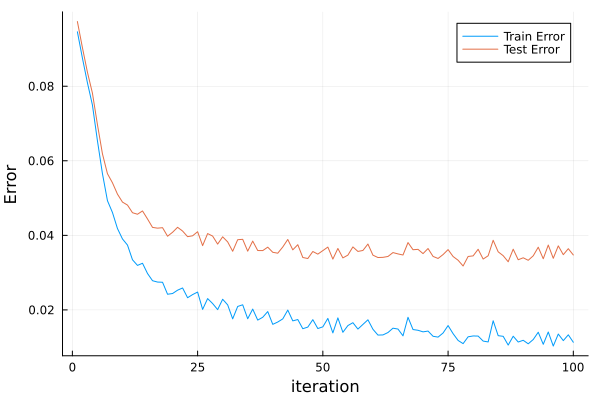

In [18]:
using Plots
plot( 1:max_iteration, SGD_minibatch_train_mse_list, label="Train Error", xlabel="iteration", ylabel="Error")
plot!(1:max_iteration, SGD_minibatch_test_mse_list,  label="Test Error",  xlabel="iteration", ylabel="Error")

In [19]:
using DataFrames
SGD_minibatch_train_mse_df = DataFrame(mse=SGD_minibatch_train_mse_list)
SGD_minibatch_test_mse_df = DataFrame(mse=SGD_minibatch_train_mse_list)

Row,mse
,Any
1,0.0946021
2,0.0875735
3,0.080946
4,0.0749719
5,0.0653935
6,0.0565712
7,0.0493032
8,0.0461305
9,0.0418261


In [20]:
using CSV
CSV.write("SGD_minibatch_train_mse.csv", SGD_minibatch_train_mse_df)
CSV.write("SGD_minibatch_test_mse.csv",  SGD_minibatch_test_mse_df)

"SGD_minibatch_test_mse.csv"

# バッチ勾配降下法

In [7]:
using LinearAlgebra, Statistics, Random
"""
データ
    訓練データ(特徴量)：flatten_x_train
    訓練データ(目的変数)：one_hot_label_y_train
"""

"""
パラメータ
"""
# 学習率
α = 0.005

# 入力層のサイズ
input_size = size(flatten_x_train)[2] # 784

# 隠れ層のサイズ
hidden_size = 300

# 出力層のサイズ
output_size = 10

W_0_1 = 0.2*rand(input_size, hidden_size).-0.1
W_1_2 = 0.2*rand(hidden_size, output_size).-0.1

# イテレーション
max_iteration = 100

# バッチサイズ
batch_size = 1000

"""
関数
"""
relu(x) = (x>0)*x

relu2deriv(output) = output>0


"""
誤差逆伝播法
"""
# MSEを保存する用のリストを作成
batch_train_mse_list = []
batch_test_mse_list = []

for iteration=1:max_iteration
    
    batch_start = 1
    batch_end = 1001
    
    # 順伝播
    layer_0 = flatten_x_train[batch_start:batch_end-1, :] # flatten_x_train[index, :]は横ベクトルで値を取得したはずが、縦ベクトルに勝手に変換されてしまう。そのため転置を行っている。
    layer_1_1 = layer_0*W_0_1 # 中間層の活性化関数に入れる前
    layer_1_2 = relu.(layer_1_1) # 中間層の活性化関数に入れた後

    # Dropoutを行う
    dropout_mask = reshape(rand(0:2, batch_size*size(layer_1_2)[2]), batch_size, size(layer_1_2)[2])
    layer_1_2 = layer_1_2.*dropout_mask
    layer_2 = layer_1_2*W_1_2

    # 更新式の差分
    ## layer_2のパラメータの更新式の差分
    ### layer_2ではなく、layer_2[1]としているのは、layer2が(1, 1)の行列になっているから
    layer_2_delta = layer_2-one_hot_label_y_train[batch_start:batch_end-1, :]
    W_1_2_delta = α*layer_1_2'*layer_2_delta # 次はここから直す

    ## layer_1のパラメータの更新式の差分
    layer_1_delta = (W_1_2*layer_2_delta'.*relu2deriv.(layer_1_1'))'
    layer_1_delta = layer_1_delta.*dropout_mask
    W_0_1_delta = α*reshape(layer_0, batch_size, 784)'*layer_1_delta

    # 更新
    W_1_2 = W_1_2-W_1_2_delta        
    W_0_1 = W_0_1-W_0_1_delta

    # MSE(Mean Square Error)の計算
    ## 全てのデータに対して順伝播を行う
    ### 訓練データ
    Layer_1_1_train = flatten_x_train*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_train = relu.(Layer_1_1_train) # 中間層の活性化関数に入れた後
    pred_list_train = Layer_1_2_train*W_1_2
    
    mse_train = mean((pred_list_train-one_hot_label_y_train).^2)
    push!(batch_train_mse_list, mse_train)
        
    ### テストデータ
    Layer_1_1_test = flatten_x_test*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_test = relu.(Layer_1_1_test) # 中間層の活性化関数に入れた後
    pred_list_test = Layer_1_2_test*W_1_2
    
    mse_test = mean((pred_list_test-one_hot_label_y_test).^2)
    push!(batch_test_mse_list, mse_test)
        
end

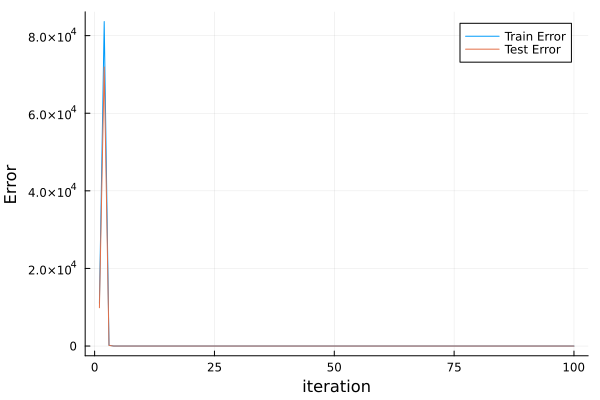

In [9]:
using Plots
plot( 1:max_iteration, batch_train_mse_list, label="Train Error", xlabel="iteration", ylabel="Error")
plot!(1:max_iteration, batch_test_mse_list,  label="Test Error",  xlabel="iteration", ylabel="Error")

In [23]:
using DataFrames
batch_train_mse_df = DataFrame(mse=batch_train_mse_list)
batch_test_mse_df  = DataFrame(mse=batch_test_mse_list)

Row,mse
,Any
1,7358.82
2,963.859
3,1.52949
4,0.0999468
5,0.0999424
6,0.0999424
7,0.0998902
8,0.0998518
9,0.09969


In [24]:
using CSV
CSV.write("batch_train_mse.csv", batch_train_mse_df)
CSV.write("batch_test_mse.csv",  batch_test_mse_df)

"batch_test_mse.csv"